# Barplot and Pie Chart

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stuper=pd.read_csv('StudentsPerformance.csv')
stuper

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## barplot using matplotlib

In [3]:
stuper_byGender=stuper.groupby('gender')
stuper_byGender.mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [4]:
genders=stuper['gender'].unique().tolist()
genders

['female', 'male']

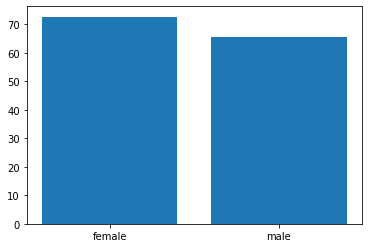

In [9]:
plt.bar(genders,stuper_byGender.mean()['reading score'])
plt.show()

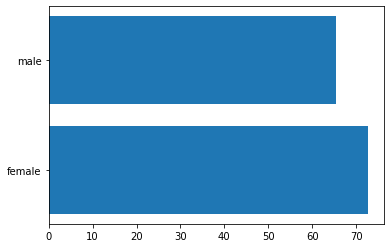

In [10]:
plt.barh(genders,stuper_byGender.mean()['reading score'])
plt.show()

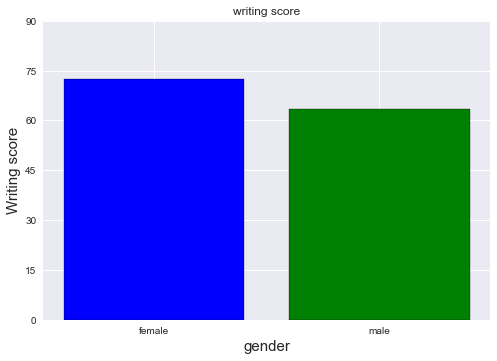

In [13]:
plt.style.use('seaborn')

barplot=plt.bar(genders,stuper_byGender.mean()['writing score'],color=['blue','green'],edgecolor='black')
plt.title('writing score')
plt.xlabel('gender', size=15)
plt.ylabel('Writing score', size=15)
plt.yticks(np.arange(0,91,15))

plt.show()

## Barplot using Seaborn

([<matplotlib.axis.YTick at 0x1aa975717f0>,
 <a list of 7 Text major ticklabel objects>)

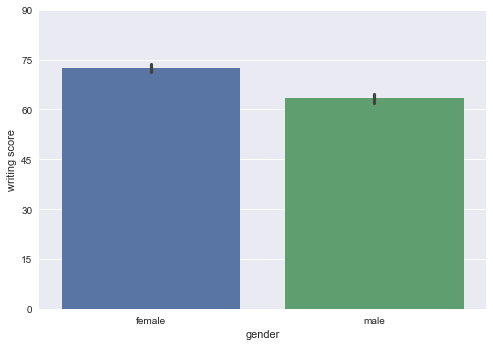

In [15]:
sns.barplot('gender','writing score',data=stuper)
plt.yticks(range(0,91,15))


Text(0.5, 1.0, 'Writing Score based on gender and lunch')

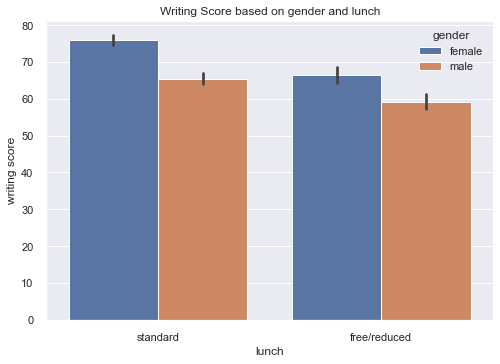

In [18]:
sns.set(style='darkgrid')
sns.barplot('lunch','writing score',hue='gender',data=stuper)
plt.title('Writing Score based on gender and lunch')

## CountPlot

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

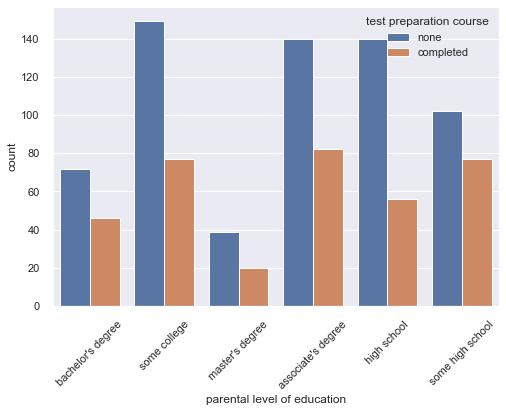

In [20]:
sns.countplot('parental level of education',hue='test preparation course',data=stuper)
plt.xticks(rotation=45)

## Pie Chart by matplotlib

In [22]:
stuper_byEtnic=stuper.groupby('race/ethnicity')
group_list=stuper['race/ethnicity'].unique().tolist()

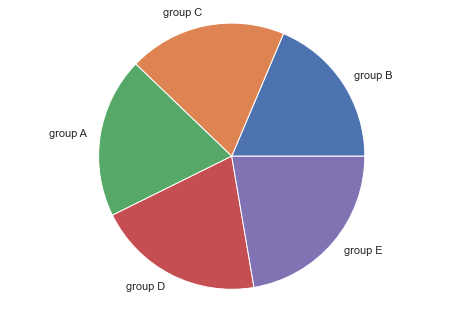

In [27]:
plt.pie(stuper_byEtnic.mean()['math score'],labels=group_list)
plt.axis('equal')
plt.show()

In [28]:
stuper_byEtnic['math score'].mean()

race/ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math score, dtype: float64

([<matplotlib.patches.Wedge at 0x1aa9775f7f0>,
 [Text(0.9138423987838437, 0.6122843050291186, 'group B'),
  Text(-0.2672528784999407, 1.1698614870716515, 'group C'),
  Text(-1.0944277187595817, 0.11058014473990563, 'group A'),
  Text(-0.5862635505085296, -1.3806864413563034, 'group D'),
  Text(0.9431371446619204, -0.7419517008262466, 'group E')],
 [Text(0.49845949024573283, 0.3339732572886101, '18.79'),
  Text(-0.15589751245829875, 0.6824192007917967, '19.57'),
  Text(-0.5969605738688626, 0.060316442585403064, '20.08'),
  Text(-0.3908423670056864, -0.9204576275708689, '20.35'),
  Text(0.5501633343861202, -0.43280515881531045, '21.22')])

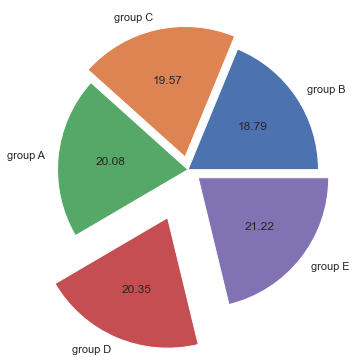

In [35]:
explode=(0,0.1,0,0.4,0.1)
plt.figure(figsize=(10,6))
plt.pie(stuper_byEtnic['reading score'].mean(),labels=group_list, autopct='%1.2f',explode=explode)

# Melbourne all Chart